# PHP - Pulsating Heat Pipe [Al2O3, 60FR]
Data collection and preparation for data analysis and machine learning 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno
sns.set()
import glob
from ipynb.fs.full.mdf import DataChop, DataArrange, DataETL

### Menualy Defined Functions (MDF)
[more details: help(function_name)]
1. DataETL
2. DataChop
3. DataArrange

## Data loading

In [3]:
# loading and cleaning data
df = DataETL('data/data_php_al2o3/')

## EDA

In [4]:
df.describe()

,Time (Min),Tc - AVG 1&2 (oC),"Te - AVG 1,2,3 (oC)",Pressure (mm of Hg).1,Te - Tc (oC),Q (W),Resistance (oC/W)
count,446.000000,445.000000,445.000000,445.000000,445.000000,445.0,445.000000
mean,27.873318,58.255056,72.934742,564.631461,14.679685,80.0,0.183497
std,16.534546,14.665791,16.196131,169.165011,4.890849,0.0,0.061136
min,0.000000,27.250000,27.330000,260.000000,0.080000,80.0,0.001042
25%,13.625000,47.500000,65.670000,410.000000,11.170000,80.0,0.139583
50%,27.500000,62.500000,78.670000,610.000000,15.420000,80.0,0.192708
75%,41.500000,70.500000,83.330000,685.000000,17.920000,80.0,0.223958
max,61.000000,82.000000,95.000000,869.000000,27.500000,80.0,0.343750


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Time (Min)             446 non-null    float64
 1   Tc - AVG 1&2 (oC)      445 non-null    float64
 2   Te - AVG 1,2,3 (oC)    445 non-null    float64
 3   Pressure (mm of Hg).1  445 non-null    float64
 4   Te - Tc (oC)           445 non-null    float64
 5   Q (W)                  445 non-null    float64
 6   Resistance (oC/W)      445 non-null    float64
dtypes: float64(7)
memory usage: 24.5 KB


<Axes: title={'center': 'Tc & Te'}, xlabel='Data', ylabel='Temperature[C]'>

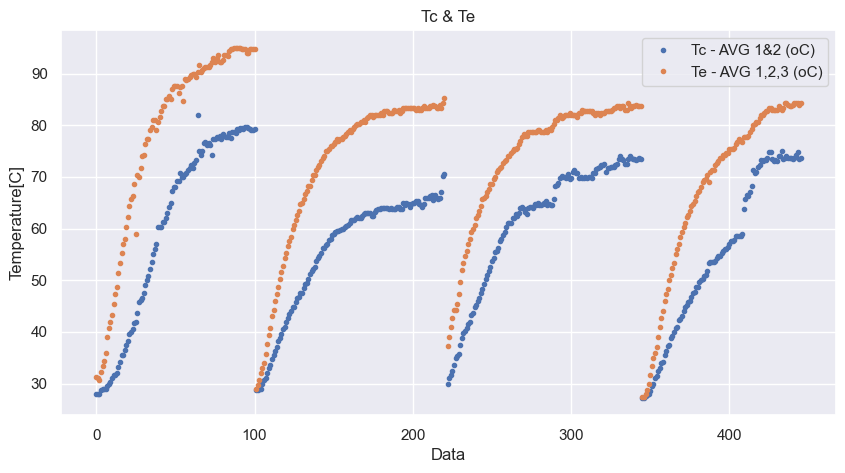

In [6]:
df[['Tc - AVG 1&2 (oC)', 'Te - AVG 1,2,3 (oC)']].plot(style='.',
                                                      figsize=(10,5),
                                                      title = 'Tc & Te',
                                                      xlabel='Data',
                                                      ylabel='Temperature[C]')

<Axes: title={'center': 'Thermal Performance'}, xlabel='Data', ylabel='Thermal Resistance [C/W]'>

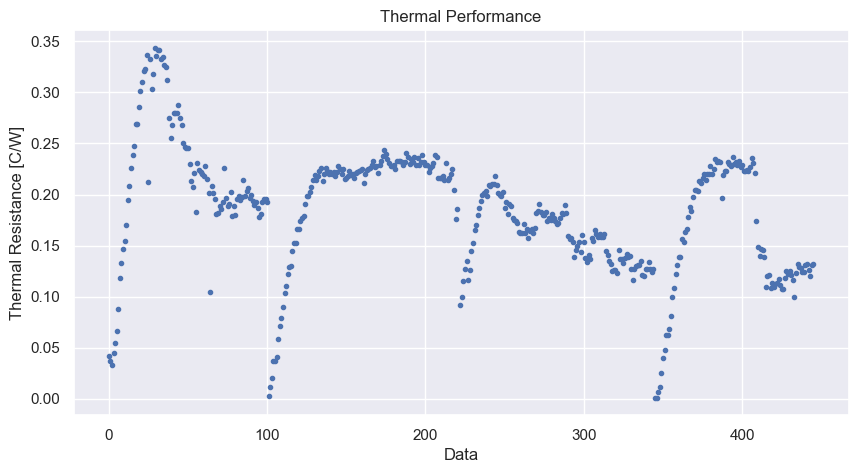

In [7]:
df['Resistance (oC/W)'].plot(style='.',
                             figsize=(10,5),
                             title =  'Thermal Performance',
                             xlabel='Data',
                             ylabel='Thermal Resistance [C/W]')

<Axes: title={'center': 'Pressure'}, xlabel='Data', ylabel='Pressure [mmHg]'>

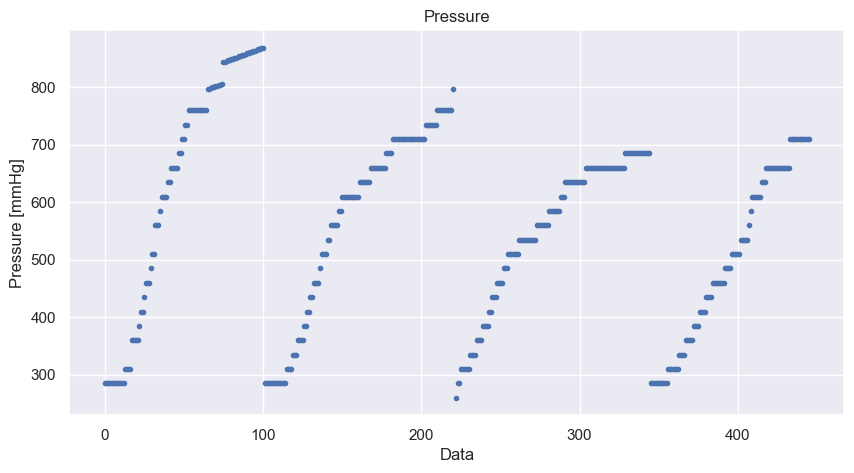

In [8]:
df['Pressure (mm of Hg).1'].plot(style='.',
                                 figsize=(10,5),
                                 title='Pressure',
                                 xlabel='Data',
                                 ylabel='Pressure [mmHg]')

<Axes: title={'center': 'Temperature Difference'}, xlabel='Data', ylabel='Temperature Difference[C]'>

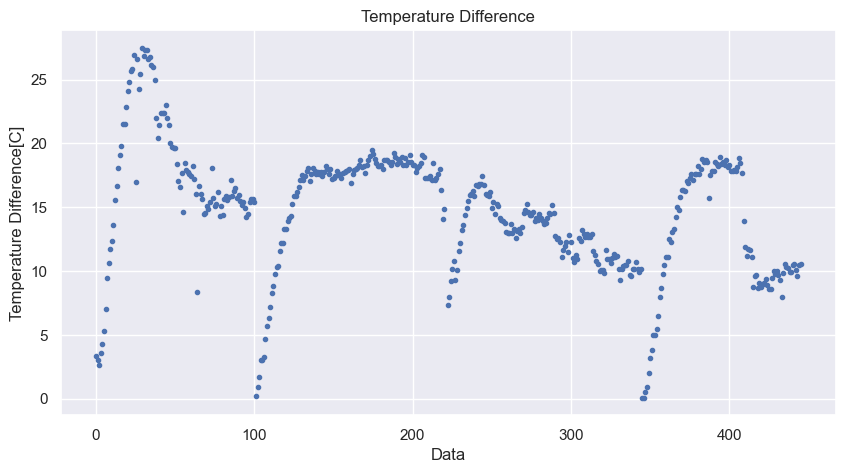

In [9]:
df['Te - Tc (oC)'].plot(style='.',
                        figsize=(10,5),
                        title=('Temperature Difference'),
                        xlabel='Data',
                        ylabel='Temperature Difference[C]')

In [54]:
# data rearranged and filtered as per Te values
df_mean = df.sort_values(by=['Te - AVG 1,2,3 (oC)']).groupby(['Te - AVG 1,2,3 (oC)'], as_index=False).mean()
df_mean

,"Te - AVG 1,2,3 (oC)",Time (Min),Tc - AVG 1&2 (oC),Pressure (mm of Hg).1,Te - Tc (oC),Q (W),Resistance (oC/W)
0,27.33,0.250000,27.250000,285.000000,0.080000,80.0,0.001042
1,28.00,1.000000,27.500000,285.000000,0.500000,80.0,0.006250
2,28.67,1.500000,27.750000,285.000000,0.920000,80.0,0.011458
3,29.00,0.000000,28.750000,285.000000,0.250000,80.0,0.003125
4,29.67,0.500000,28.750000,285.000000,0.920000,80.0,0.011458
...,...,...,...,...,...,...,...
151,93.67,40.000000,77.750000,849.000000,15.920000,80.0,0.198958
152,94.00,47.750000,79.625000,864.500000,14.375000,80.0,0.179688
153,94.33,42.000000,78.500000,853.000000,15.830000,80.0,0.197917
154,94.67,46.888889,79.027778,862.777778,15.642222,80.0,0.195486


In [55]:
# data rearranged and calculating standard deviation at grouped points to calculate expaned uncertainty
df_std = df.sort_values(by=['Te - AVG 1,2,3 (oC)']).groupby(['Te - AVG 1,2,3 (oC)'], as_index=False).std().dropna()
df_std


,"Te - AVG 1,2,3 (oC)",Time (Min),Tc - AVG 1&2 (oC),Pressure (mm of Hg).1,Te - Tc (oC),Q (W),Resistance (oC/W)
0,27.33,0.353553,0.000000,0.000000,0.000000,0.0,0.000000
6,30.67,0.000000,0.707107,0.000000,0.707107,0.0,0.008839
13,33.33,0.707107,0.353553,0.000000,0.353553,0.0,0.004419
18,36.00,0.707107,1.414214,0.000000,1.414214,0.0,0.017678
22,39.00,2.291288,1.500000,0.000000,1.500000,0.0,0.018750
...,...,...,...,...,...,...,...
149,93.00,0.707107,0.353553,27.577164,0.353553,0.0,0.004419
151,93.67,1.322876,0.250000,2.645751,0.250000,0.0,0.003125
152,94.00,0.353553,0.176777,0.707107,0.176777,0.0,0.002210
154,94.67,2.713137,0.642802,5.426274,0.642802,0.0,0.008035


<Axes: xlabel='Data', ylabel='Temperature[C]'>

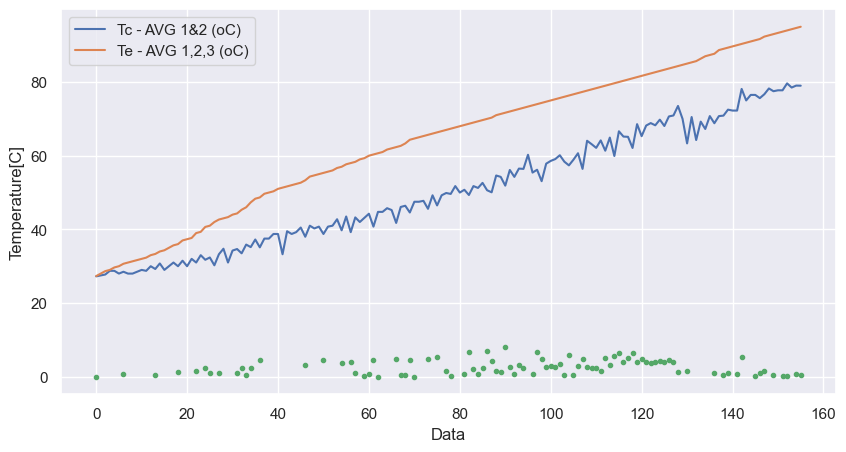

In [94]:
df_mean[['Tc - AVG 1&2 (oC)', 'Te - AVG 1,2,3 (oC)']].plot(style='-',
        figsize=(10,5))
df_std['Tc - AVG 1&2 (oC)'].plot(style='.', xlabel='Data', ylabel='Temperature[C]')


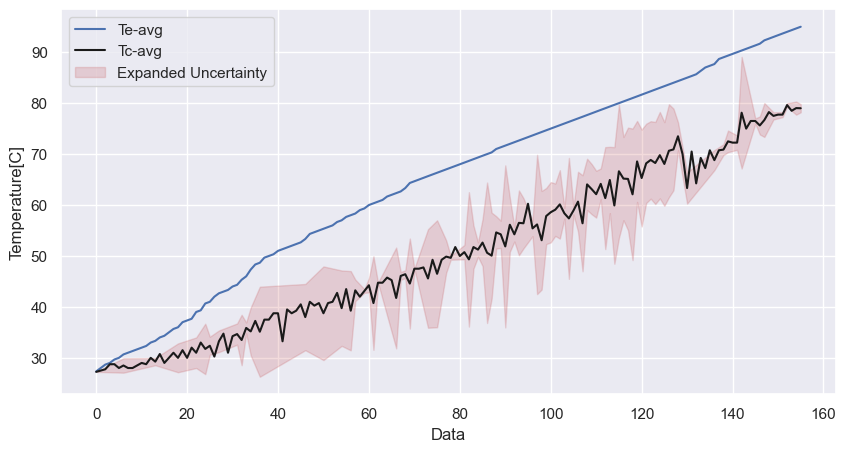

In [119]:
# plot of Tc and Te average tempratures with calculated expanded uncertainty with 95% confidence interval
plt.figure(figsize=(10,5));
plt.plot(df_mean['Te - AVG 1,2,3 (oC)'].index, df_mean['Te - AVG 1,2,3 (oC)'], 'b', label='Te-avg')
plt.plot(df_mean['Tc - AVG 1&2 (oC)'].index, df_mean['Tc - AVG 1&2 (oC)'], 'k', label='Tc-avg' )
idx = df_std.index
df_mean_idx = df_mean.loc[idx]
plt.fill_between(df_std['Tc - AVG 1&2 (oC)'].index, df_mean_idx['Tc - AVG 1&2 (oC)'] - 2* df_std['Tc - AVG 1&2 (oC)'], df_mean_idx['Tc - AVG 1&2 (oC)'] + 2* df_std['Tc - AVG 1&2 (oC)'],color='r', alpha=0.2, label='Expanded Uncertainty')
plt.xlabel('Data')
plt.ylabel('Temperature[C]')
plt.legend()
